<h1>Diplomamunka - Nem felismerés - Dropout</h1>

In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

<h2>UTKFace dataset</h2>

The source of the dataset: https://www.kaggle.com/datasets/jangedoo/utkface-new

In [2]:
images=[]
ages=[]
genders=[]
gendersstr=[]
#folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/UTKFace/utkface_aligned_cropped/crop_part1"
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/UTKFace/UTKFace"
for filename in os.listdir(folder):
    split =filename.split('_')
    ages.append(int(split[0]))
    genders.append(split[1])
    if int(split[1]) == 0:
        gendersstr.append('male')
    else:
        gendersstr.append('female')
    images.append(filename)

In [3]:
images=pd.Series(images,name='Filename')
ages=pd.Series(ages,name='Age')
genders=pd.Series(genders,name='Gender')
gendersstr=pd.Series(gendersstr,name='Gender_str')
df=pd.concat([images,ages,genders,gendersstr],axis=1)
df.head(20)

,Filename,Age,Gender,Gender_str
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0,male
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0,male
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1,female
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1,female
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1,female
5,100_1_0_20170112215032192.jpg.chip.jpg,100,1,female
6,100_1_0_20170117195420803.jpg.chip.jpg,100,1,female
7,100_1_0_20170119212053665.jpg.chip.jpg,100,1,female
8,100_1_2_20170105174847679.jpg.chip.jpg,100,1,female
9,100_1_2_20170112213615815.jpg.chip.jpg,100,1,female


In [4]:
df.info

<bound method DataFrame.info of                                      Filename  Age Gender Gender_str
0      100_0_0_20170112213500903.jpg.chip.jpg  100      0       male
1      100_0_0_20170112215240346.jpg.chip.jpg  100      0       male
2      100_1_0_20170110183726390.jpg.chip.jpg  100      1     female
3      100_1_0_20170112213001988.jpg.chip.jpg  100      1     female
4      100_1_0_20170112213303693.jpg.chip.jpg  100      1     female
...                                       ...  ...    ...        ...
23703    9_1_3_20161220222856346.jpg.chip.jpg    9      1     female
23704    9_1_3_20170104222949455.jpg.chip.jpg    9      1     female
23705    9_1_4_20170103200637399.jpg.chip.jpg    9      1     female
23706    9_1_4_20170103200814791.jpg.chip.jpg    9      1     female
23707    9_1_4_20170103213057382.jpg.chip.jpg    9      1     female

[23708 rows x 4 columns]>

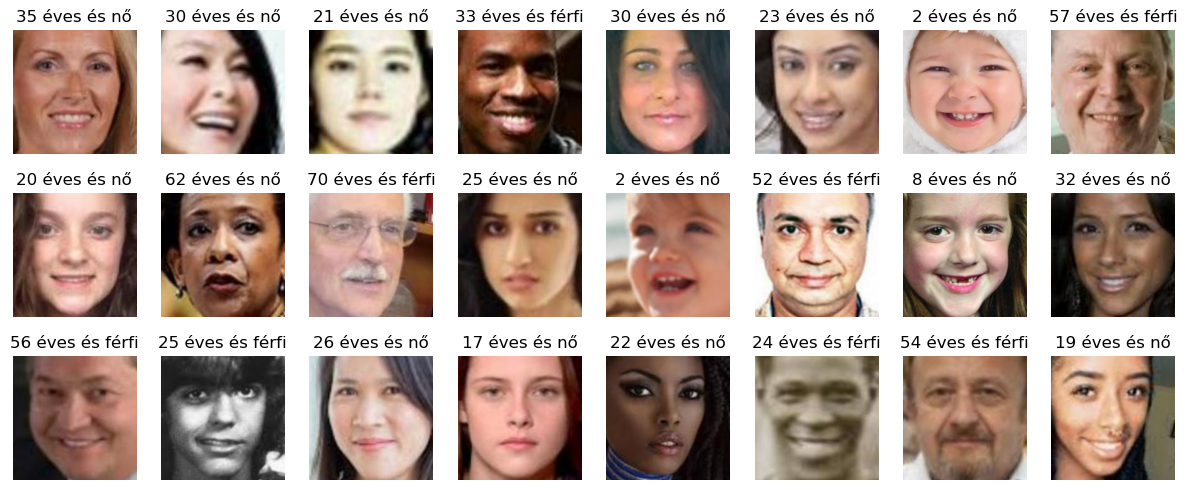

In [5]:
fig=plt.figure(figsize=(15,6))
for i in range(24):
    fig.add_subplot(3,8,i+1)
    x = random.randint(0,23707)
    img = cv2.cvtColor(cv2.imread(os.path.join(folder,df.iloc[x]['Filename'])), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    label = str(df.iloc[x]['Age']) + " éves és "
    
    if df.iloc[x]['Gender']=="0":
        label += "férfi"
    else:
        label += "nő"
    plt.title(label)
    plt.axis('off')
    
plt.show()

<h2>CKPLUS adathalmaz</h2>

<h2>NEM</h2>

In [6]:
from sklearn.model_selection import train_test_split

#validation

images_data = df['Filename']
labels_data = df['Gender'] #0 férfi, 1 nő
train1_images, val_images, train1_labels, val_labels = train_test_split(images_data, labels_data, test_size=0.2, shuffle=True)
#train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.4, shuffle=True)

In [7]:
d = {'filename':train1_images,'gender':train1_labels}
train_1 = pd.concat(d,axis=1)
train_1

,filename,gender
12580,34_0_3_20170119164730142.jpg.chip.jpg,0
7103,26_1_1_20170116024044126.jpg.chip.jpg,1
11934,32_1_0_20170104171643865.jpg.chip.jpg,1
4377,24_0_4_20170103223915799.jpg.chip.jpg,0
8484,27_1_3_20170104232645690.jpg.chip.jpg,1
...,...,...
8182,27_0_3_20170119193300742.jpg.chip.jpg,0
6271,26_0_1_20170117200522916.jpg.chip.jpg,0
12320,33_1_0_20170103182622241.jpg.chip.jpg,1
10756,30_0_2_20170116173046870.jpg.chip.jpg,0


In [8]:
d = {'filename':val_images,'gender':val_labels}
val = pd.concat(d,axis=1)
val

,filename,gender
15018,39_1_2_20170103183338179.jpg.chip.jpg,1
4514,24_1_0_20170117150909051.jpg.chip.jpg,1
21261,65_1_0_20170110123555351.jpg.chip.jpg,1
21739,6_1_1_20161220220432570.jpg.chip.jpg,1
6254,26_0_1_20170117195838909.jpg.chip.jpg,0
...,...,...
15332,3_1_4_20170103210847515.jpg.chip.jpg,1
16382,43_1_0_20170117155109008.jpg.chip.jpg,1
5193,25_0_3_20170104214558568.jpg.chip.jpg,0
12084,32_1_1_20170113011625824.jpg.chip.jpg,1


In [9]:
#train, test

images2_data = train_1.filename
labels2_data = train_1.gender #0 férfi, 1 nő
train_images, test_images, train_labels, test_labels = train_test_split(images2_data, labels2_data, test_size=0.2, shuffle=True)

In [10]:
d = {'filename':train_images,'gender':train_labels}
train = pd.concat(d,axis=1)
train

,filename,gender
14375,37_1_0_20170109003001568.jpg.chip.jpg,1
14999,39_1_1_20170113012730059.jpg.chip.jpg,1
22374,76_1_2_20170110180413588.jpg.chip.jpg,1
2744,20_0_1_20170113133037011.jpg.chip.jpg,0
11907,32_0_4_20170105163336092.jpg.chip.jpg,0
...,...,...
15747,40_1_0_20170117150823490.jpg.chip.jpg,1
23387,8_1_4_20161223232240516.jpg.chip.jpg,1
9927,29_1_1_20170117183625423.jpg.chip.jpg,1
22597,7_1_2_20161219141129768.jpg.chip.jpg,1


In [11]:
d = {'filename':test_images,'gender':test_labels}
test = pd.concat(d,axis=1)
test

,filename,gender
5952,26_0_0_20170117195622444.jpg.chip.jpg,0
1367,18_1_0_20170109214557098.jpg.chip.jpg,1
10662,30_0_1_20170113133238257.jpg.chip.jpg,0
17219,47_0_3_20170119205127722.jpg.chip.jpg,0
16343,43_0_3_20170119164231565.jpg.chip.jpg,0
...,...,...
13014,35_0_0_20170119200925684.jpg.chip.jpg,0
20145,59_1_1_20170112210446395.jpg.chip.jpg,1
11202,30_1_3_20170119195849148.jpg.chip.jpg,1
14598,38_0_3_20170119144055864.jpg.chip.jpg,0


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
batch = 32
img_height = 200
img_width = 200

In [15]:
train_gen = ImageDataGenerator(rotation_range=25,
                               rescale=1./255,
                               brightness_range=[0.6,1.4]
)
test_gen = ImageDataGenerator(rescale = 1./255)

In [16]:
train_data = train_gen.flow_from_dataframe(dataframe = train, 
                                           directory = folder, 
                                           x_col = 'filename',
                                           y_col = 'gender', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="binary",
                                           target_size = (img_height,img_width))

Found 15172 validated image filenames belonging to 2 classes.


In [17]:
test_data = test_gen.flow_from_dataframe(dataframe = test, 
                                           directory = folder, 
                                           x_col = 'filename',
                                           y_col = 'gender', seed = 42,
                                           batch_size = batch,
                                           shuffle = False, 
                                           class_mode="binary",
                                           target_size = (img_height,img_width))

Found 3794 validated image filenames belonging to 2 classes.


In [18]:
val_data = test_gen.flow_from_dataframe(dataframe = val, 
                                           directory = folder, 
                                           x_col = 'filename',
                                           y_col = 'gender', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="binary",
                                           target_size = (img_height,img_width))

Found 4742 validated image filenames belonging to 2 classes.


In [19]:
from keras import models
import tensorflow as tf
from tensorflow.keras import layers

In [20]:
network_gender2 = models.Sequential()
#network.add(layers.experimental.preprocessing.Rescaling(1./255))
network_gender2.add(layers.Conv2D(36, kernel_size=3, activation='relu', input_shape=(img_height,img_width,3)))
network_gender2.add(layers.MaxPool2D(pool_size=3, strides=2))
network_gender2.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
network_gender2.add(layers.MaxPool2D(pool_size=3, strides=2))
network_gender2.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
network_gender2.add(layers.MaxPool2D(pool_size=3, strides=2))
network_gender2.add(layers.Conv2D(256, kernel_size=3, activation='relu'))
network_gender2.add(layers.MaxPool2D(pool_size=3, strides=2))
network_gender2.add(layers.Flatten())
network_gender2.add(layers.Dropout(0.5))
network_gender2.add(layers.Dense(256, activation='relu'))
network_gender2.add(layers.Dense(1, activation='sigmoid'))

In [21]:
network_gender2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [23]:
history2 = network_gender2.fit(
    train_data,
    validation_data=val_data,
    epochs= 25,
    callbacks = callback,
    #shuffle=True
)
eff_epochs = len(history2.history['loss'])

Epoch 1/25
475/475 [==============================] - 679s 1s/step - loss: 0.5529 - accuracy: 0.7205 - val_loss: 0.4483 - val_accuracy: 0.7830
Epoch 2/25
475/475 [==============================] - 644s 1s/step - loss: 0.4686 - accuracy: 0.7805 - val_loss: 0.4146 - val_accuracy: 0.8092
Epoch 3/25
475/475 [==============================] - 636s 1s/step - loss: 0.4333 - accuracy: 0.8039 - val_loss: 0.3759 - val_accuracy: 0.8313
Epoch 4/25
475/475 [==============================] - 632s 1s/step - loss: 0.4036 - accuracy: 0.8133 - val_loss: 0.3553 - val_accuracy: 0.8420
Epoch 5/25
475/475 [==============================] - 630s 1s/step - loss: 0.3829 - accuracy: 0.8246 - val_loss: 0.3312 - val_accuracy: 0.8593
Epoch 6/25
475/475 [==============================] - 630s 1s/step - loss: 0.3645 - accuracy: 0.8354 - val_loss: 0.3249 - val_accuracy: 0.8608
Epoch 7/25
475/475 [==============================] - 636s 1s/step - loss: 0.3456 - accuracy: 0.8454 - val_loss: 0.3053 - val_accuracy: 0.8680

In [24]:
network_gender2.save('C:/Users/gyory/Documents/Diplomamunka/modells/network_gender13.keras')

In [25]:
network_gender2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 36)      1008      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 128)      0

In [26]:
test_loss, test_acc = network_gender2.evaluate(test_data)

119/119 [==============================] - 31s 256ms/step - loss: 0.2816 - accuracy: 0.8777


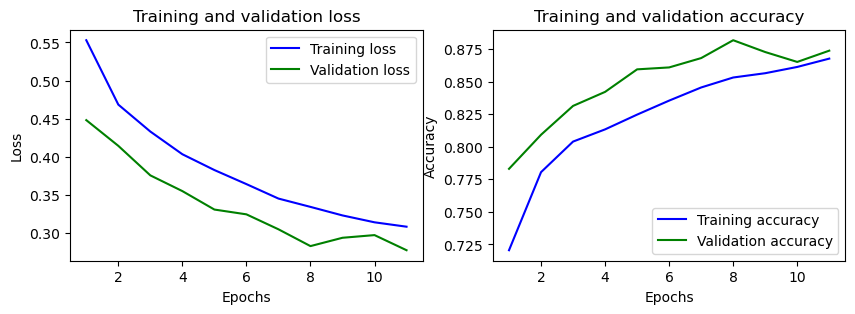

In [27]:
plt.figure(figsize=[10,3])
plt.subplot(121); 

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122); 

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy' )
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [28]:
test_pred = network_gender2.predict(test_data)

119/119 [==============================] - 30s 252ms/step


In [29]:
print(test_pred)

[[0.01594386]
 [0.9988002 ]
 [0.01889375]
 ...
 [0.99833524]
 [0.95602727]
 [0.00461569]]


In [30]:
test_pred_bool = np.rint(test_pred)
print(test_pred_bool)

[[0.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(test_data.classes,test_pred_bool,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.93      0.82      0.88      1977
           1       0.83      0.94      0.88      1817

    accuracy                           0.88      3794
   macro avg       0.88      0.88      0.88      3794
weighted avg       0.88      0.88      0.88      3794



In [32]:
from tensorflow.keras.utils import plot_model

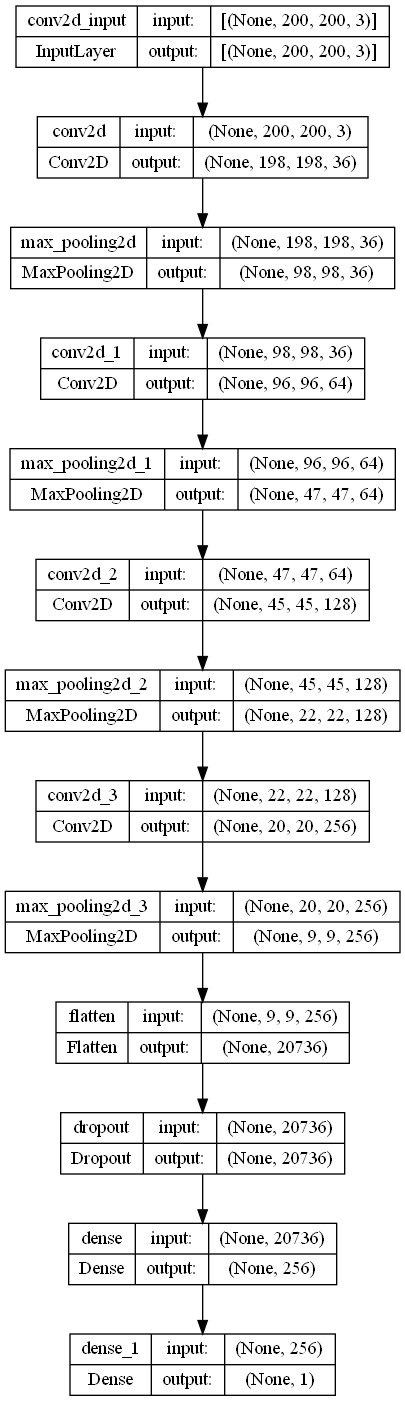

In [33]:
plot_model(network_gender2, show_shapes=True)